# IMPORTS

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

# DATA LOADING

In [3]:
df = pd.read_csv('EEW_features_2024-10-21.csv')

df.columns

Index([' filename ', ' date ', ' time ', ' Rmag ', ' Rdpth ', ' Rlat ',
       ' Rlon ', ' Station ', ' Sheight ', ' Slat ', ' Slon ', ' RSdistance ',
       ' azimuth ', ' pkev12 ', ' pkev23 ', ' durP ', ' tauPd ', ' tauPt ',
       ' PDd ', ' PVd ', ' PAd ', ' PDt ', ' PVt ', 'PAt ', ' ddt_PDd ',
       ' ddt_PVd ', ' ddt_PAd ', ' ddt_PDt ', ' ddt_PVt ', 'ddt_PAt ', ' PGA ',
       ' PGV ', ' tPGA ', ' tPGV '],
      dtype='object')

In [4]:
df.head()

,filename,date,time,Rmag,Rdpth,Rlat,Rlon,Station,Sheight,Slat,...,ddt_PDd,ddt_PVd,ddt_PAd,ddt_PDt,ddt_PVt,ddt_PAt,PGA,PGV,tPGA,tPGV
0,1,2,3,4.0,5,6.000,7.000,8,9.0,10.0000,...,25.00000,26.00000,27.00000,28,29,30,31.000,32.000,33.00,34.00
1,'HKD0540001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD054,63.0,43.7996,...,0.00637,0.08890,0.69803,0.04389,0.21261,1.91145,26.949,7.176,32.19,31.36
2,'HKD0550001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD055,23.0,43.8244,...,0.00554,0.05553,1.18973,0.05951,0.39105,6.53578,60.838,8.211,30.04,30.43
3,'HKD0590001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD059,30.0,43.8569,...,0.02187,0.09294,1.50502,0.07332,0.26394,7.50573,108.173,17.529,28.40,31.00
4,'HKD0600001282321.EW',2000/01/28,23:21:00,6.8,56,42.983,146.711,HKD060,6.0,43.9136,...,0.00051,0.09748,3.17435,0.07002,0.44141,15.92743,155.062,14.556,27.09,30.06


In [5]:
data = df[[' pkev12 ', ' pkev23 ', ' durP ', ' tauPd ', ' tauPt ',
       ' PDd ', ' PVd ', ' PAd ', ' PDt ', ' PVt ', 'PAt ', ' ddt_PDd ',
       ' ddt_PVd ', ' ddt_PAd ', ' PGA ']]

data = data.replace([np.inf, -np.inf], np.nan)
data.columns = data.columns.str.strip()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25437 entries, 0 to 25436
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pkev12   25437 non-null  float64
 1   pkev23   25437 non-null  float64
 2   durP     25437 non-null  float64
 3   tauPd    25437 non-null  float64
 4   tauPt    25437 non-null  float64
 5   PDd      25437 non-null  float64
 6   PVd      25437 non-null  float64
 7   PAd      25437 non-null  float64
 8   PDt      25437 non-null  float64
 9   PVt      25437 non-null  float64
 10  PAt      25437 non-null  float64
 11  ddt_PDd  25437 non-null  float64
 12  ddt_PVd  25437 non-null  float64
 13  ddt_PAd  25437 non-null  float64
 14  PGA      25437 non-null  float64
dtypes: float64(15)
memory usage: 2.9 MB


In [6]:
data['PGA'].describe()

,PGA
count,25437.000000
mean,118.728420
std,264.499408
min,0.477000
25%,9.655000
50%,32.791000
75%,107.627000
max,6253.012000


# SCALING PGA

In [7]:
data.loc[:, 'PGA'] = data['PGA']
data['PGA'].describe()

,PGA
count,25437.000000
mean,118.728420
std,264.499408
min,0.477000
25%,9.655000
50%,32.791000
75%,107.627000
max,6253.012000


# LINEAR CORRELATION

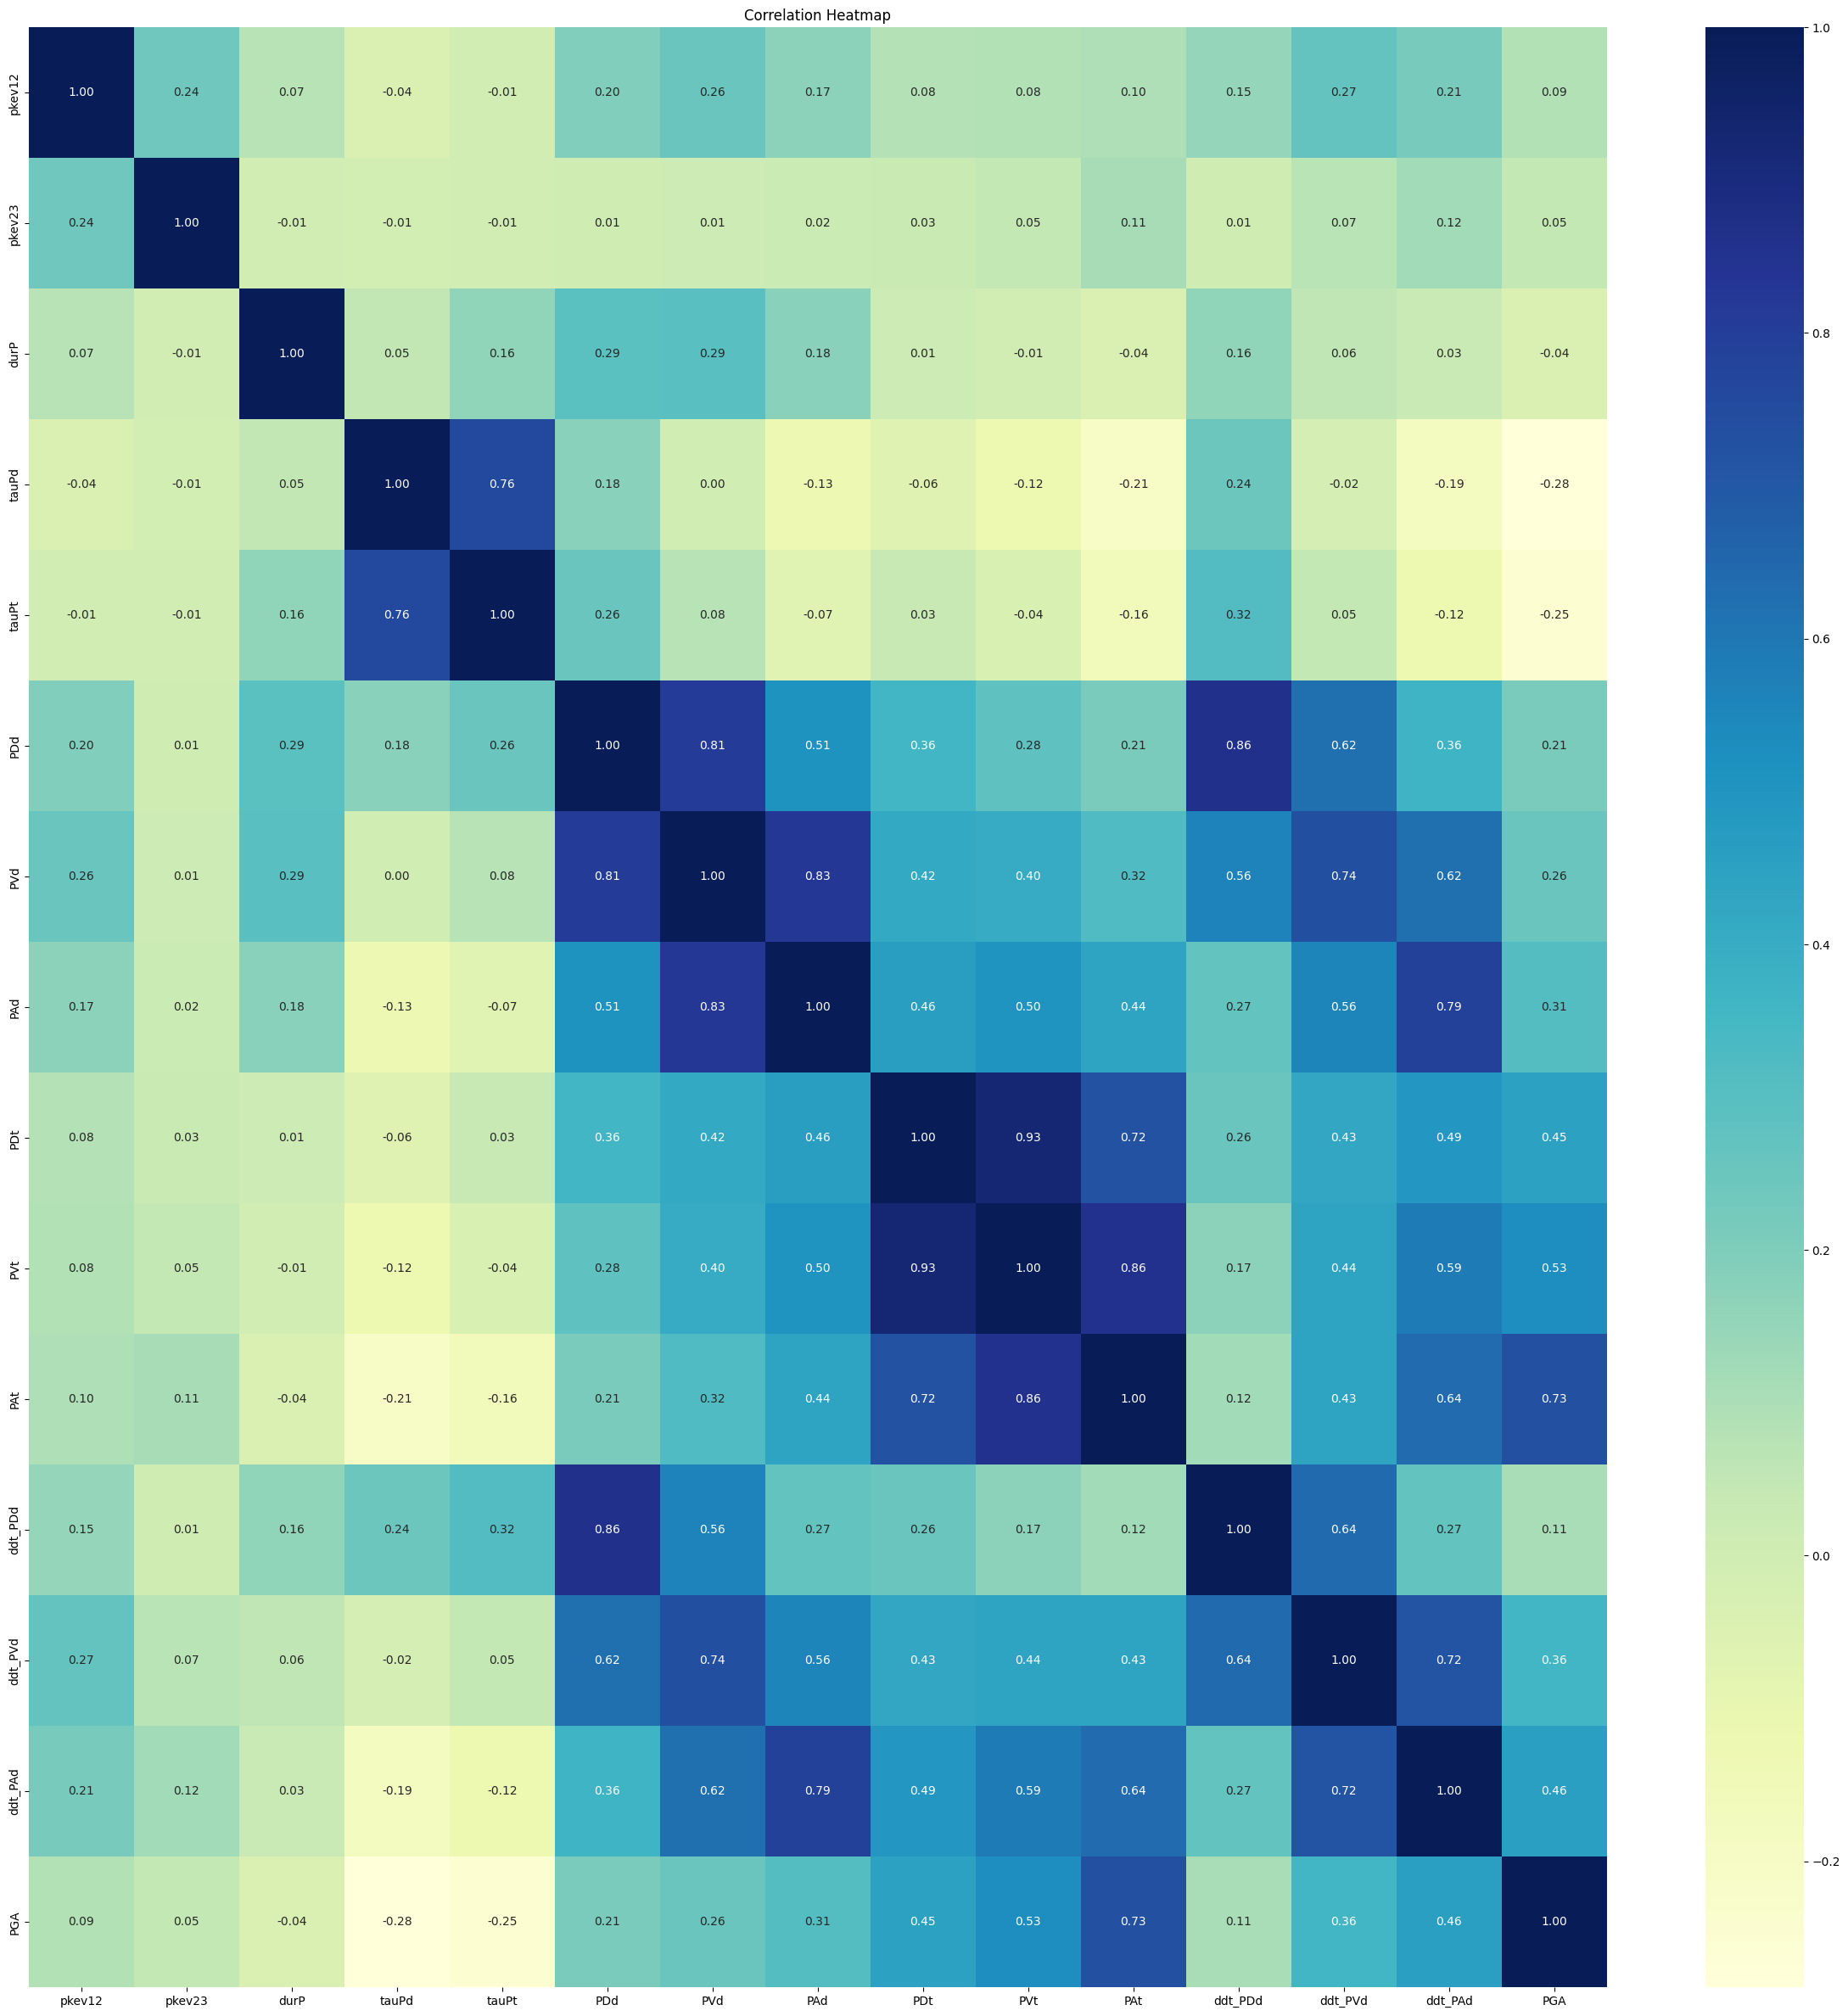

In [8]:
plt.figure(figsize=(30,30))

sns.heatmap(data.corr(), fmt=".2f", cmap='YlGnBu', annot=True)

plt.title("Correlation Heatmap")

plt.show()

In [9]:
data.corr()['PGA'].sort_values(ascending=False)

,PGA
PGA,1.000000
PAt,0.729996
PVt,0.527991
ddt_PAd,0.456526
PDt,0.449657
ddt_PVd,0.358191
PAd,0.311182
PVd,0.258245
PDd,0.210669
ddt_PDd,0.106611


# SAMPLED SCATTER PLOT AND FEATURE HISTOGRAM

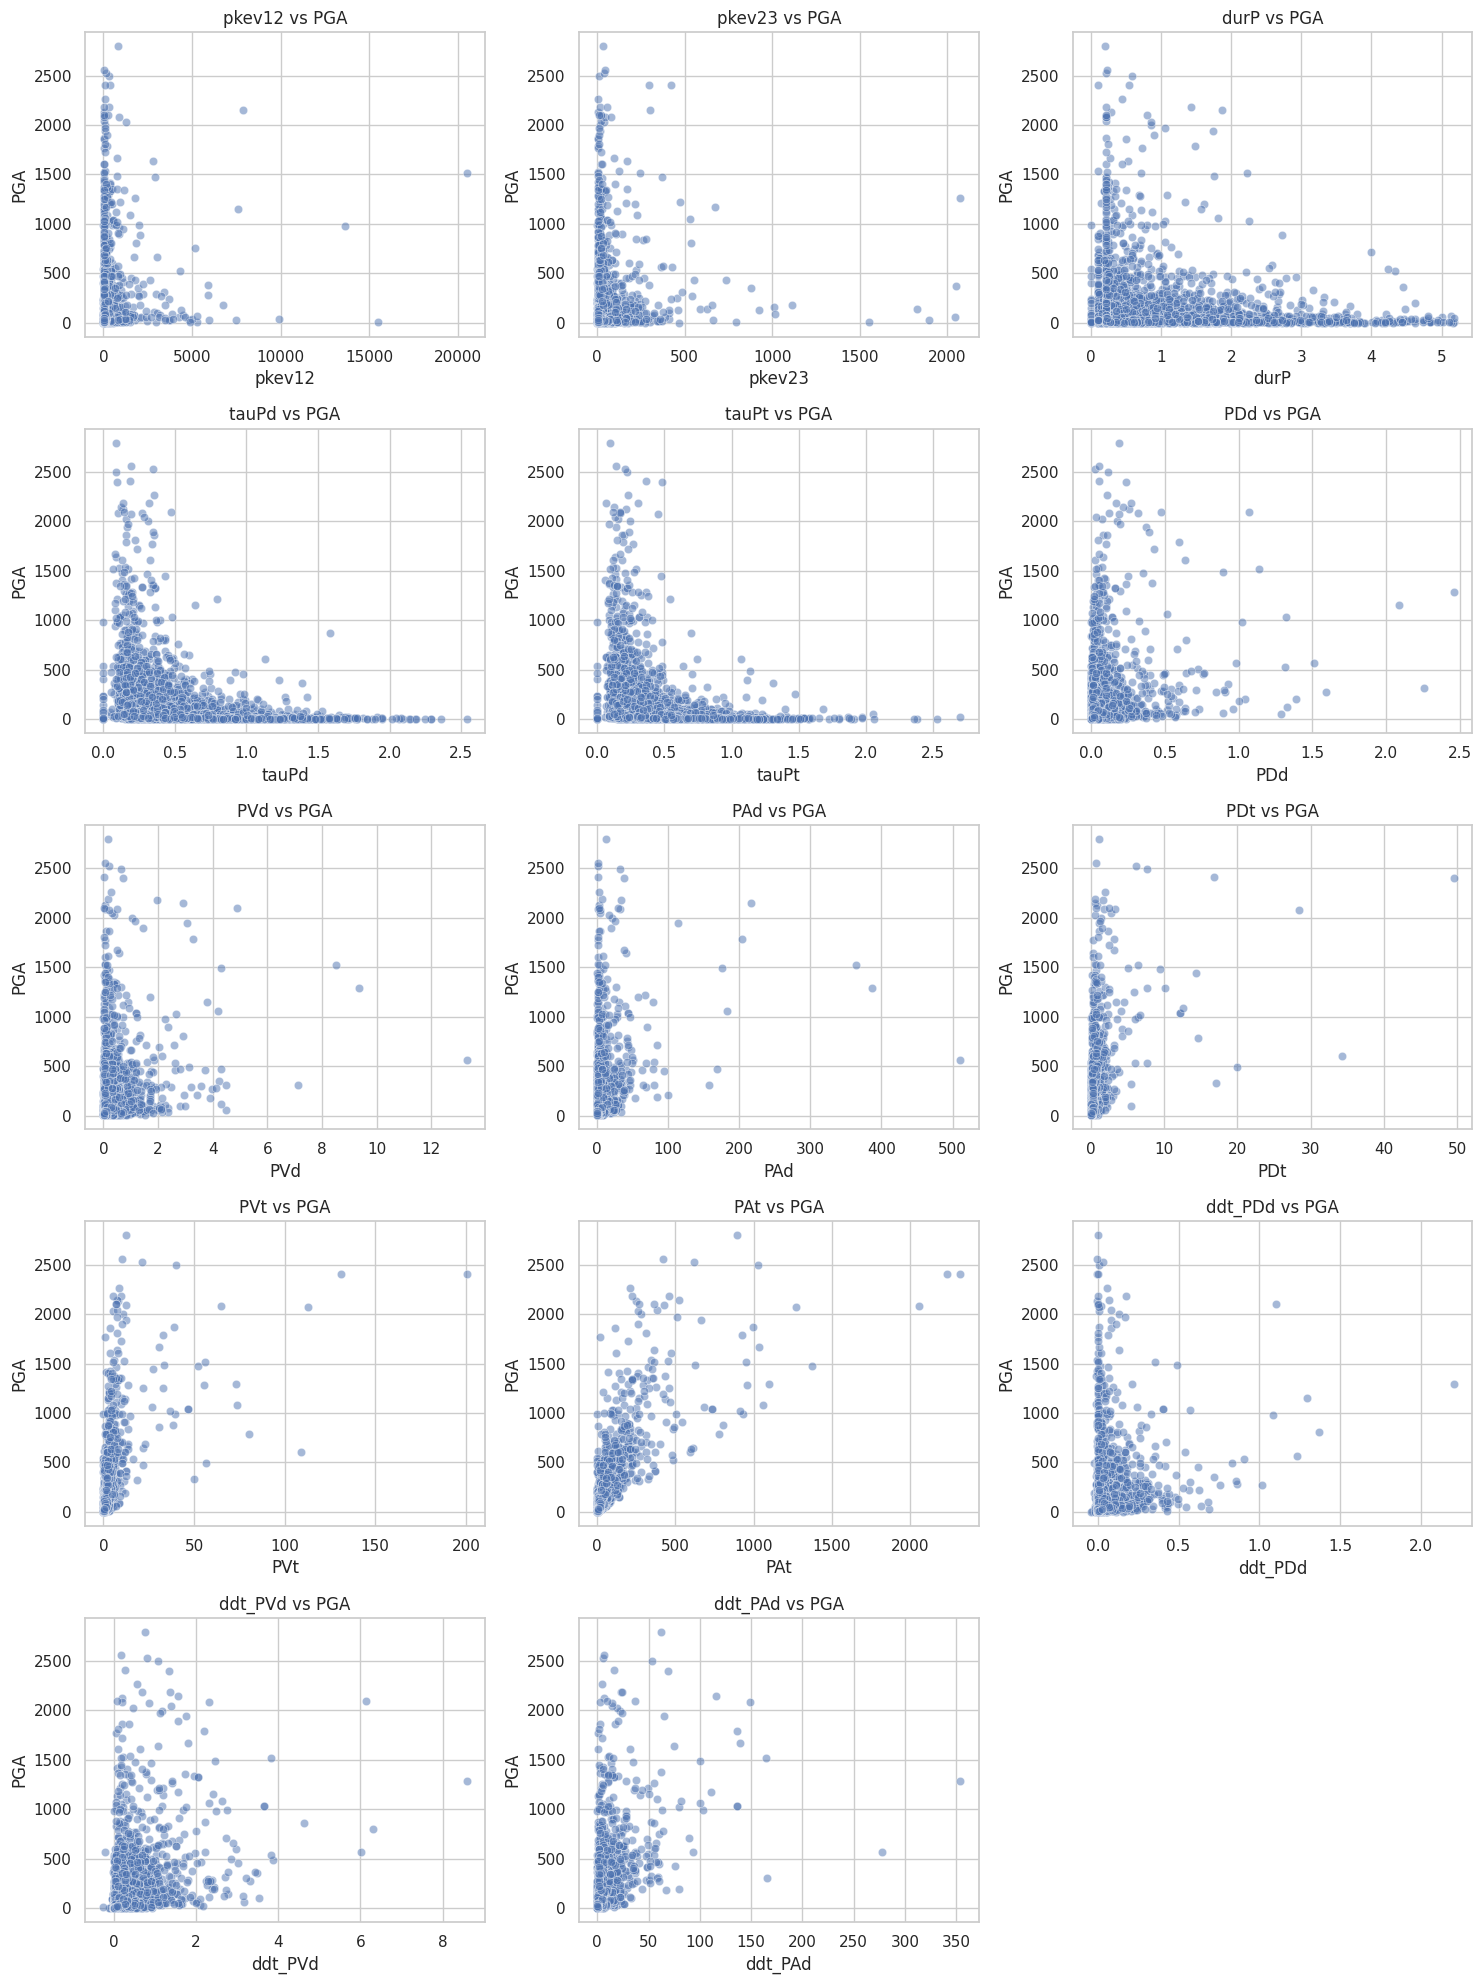

In [10]:
#SAMPLING DONE BECAUSE OF COMPUTATIONAL LIMITATIONS


max_points = 5000
plot_data = data.sample(n=max_points, random_state=42) if len(data) > max_points else data.copy()

features = plot_data.columns.tolist()
features.remove('PGA')  # target
target = 'PGA'

sns.set(style="whitegrid")

n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(x=plot_data[feature], y=plot_data[target],
                    ax=axes[i], alpha=0.5)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('PGA')
    axes[i].set_title(f'{feature} vs PGA')


for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


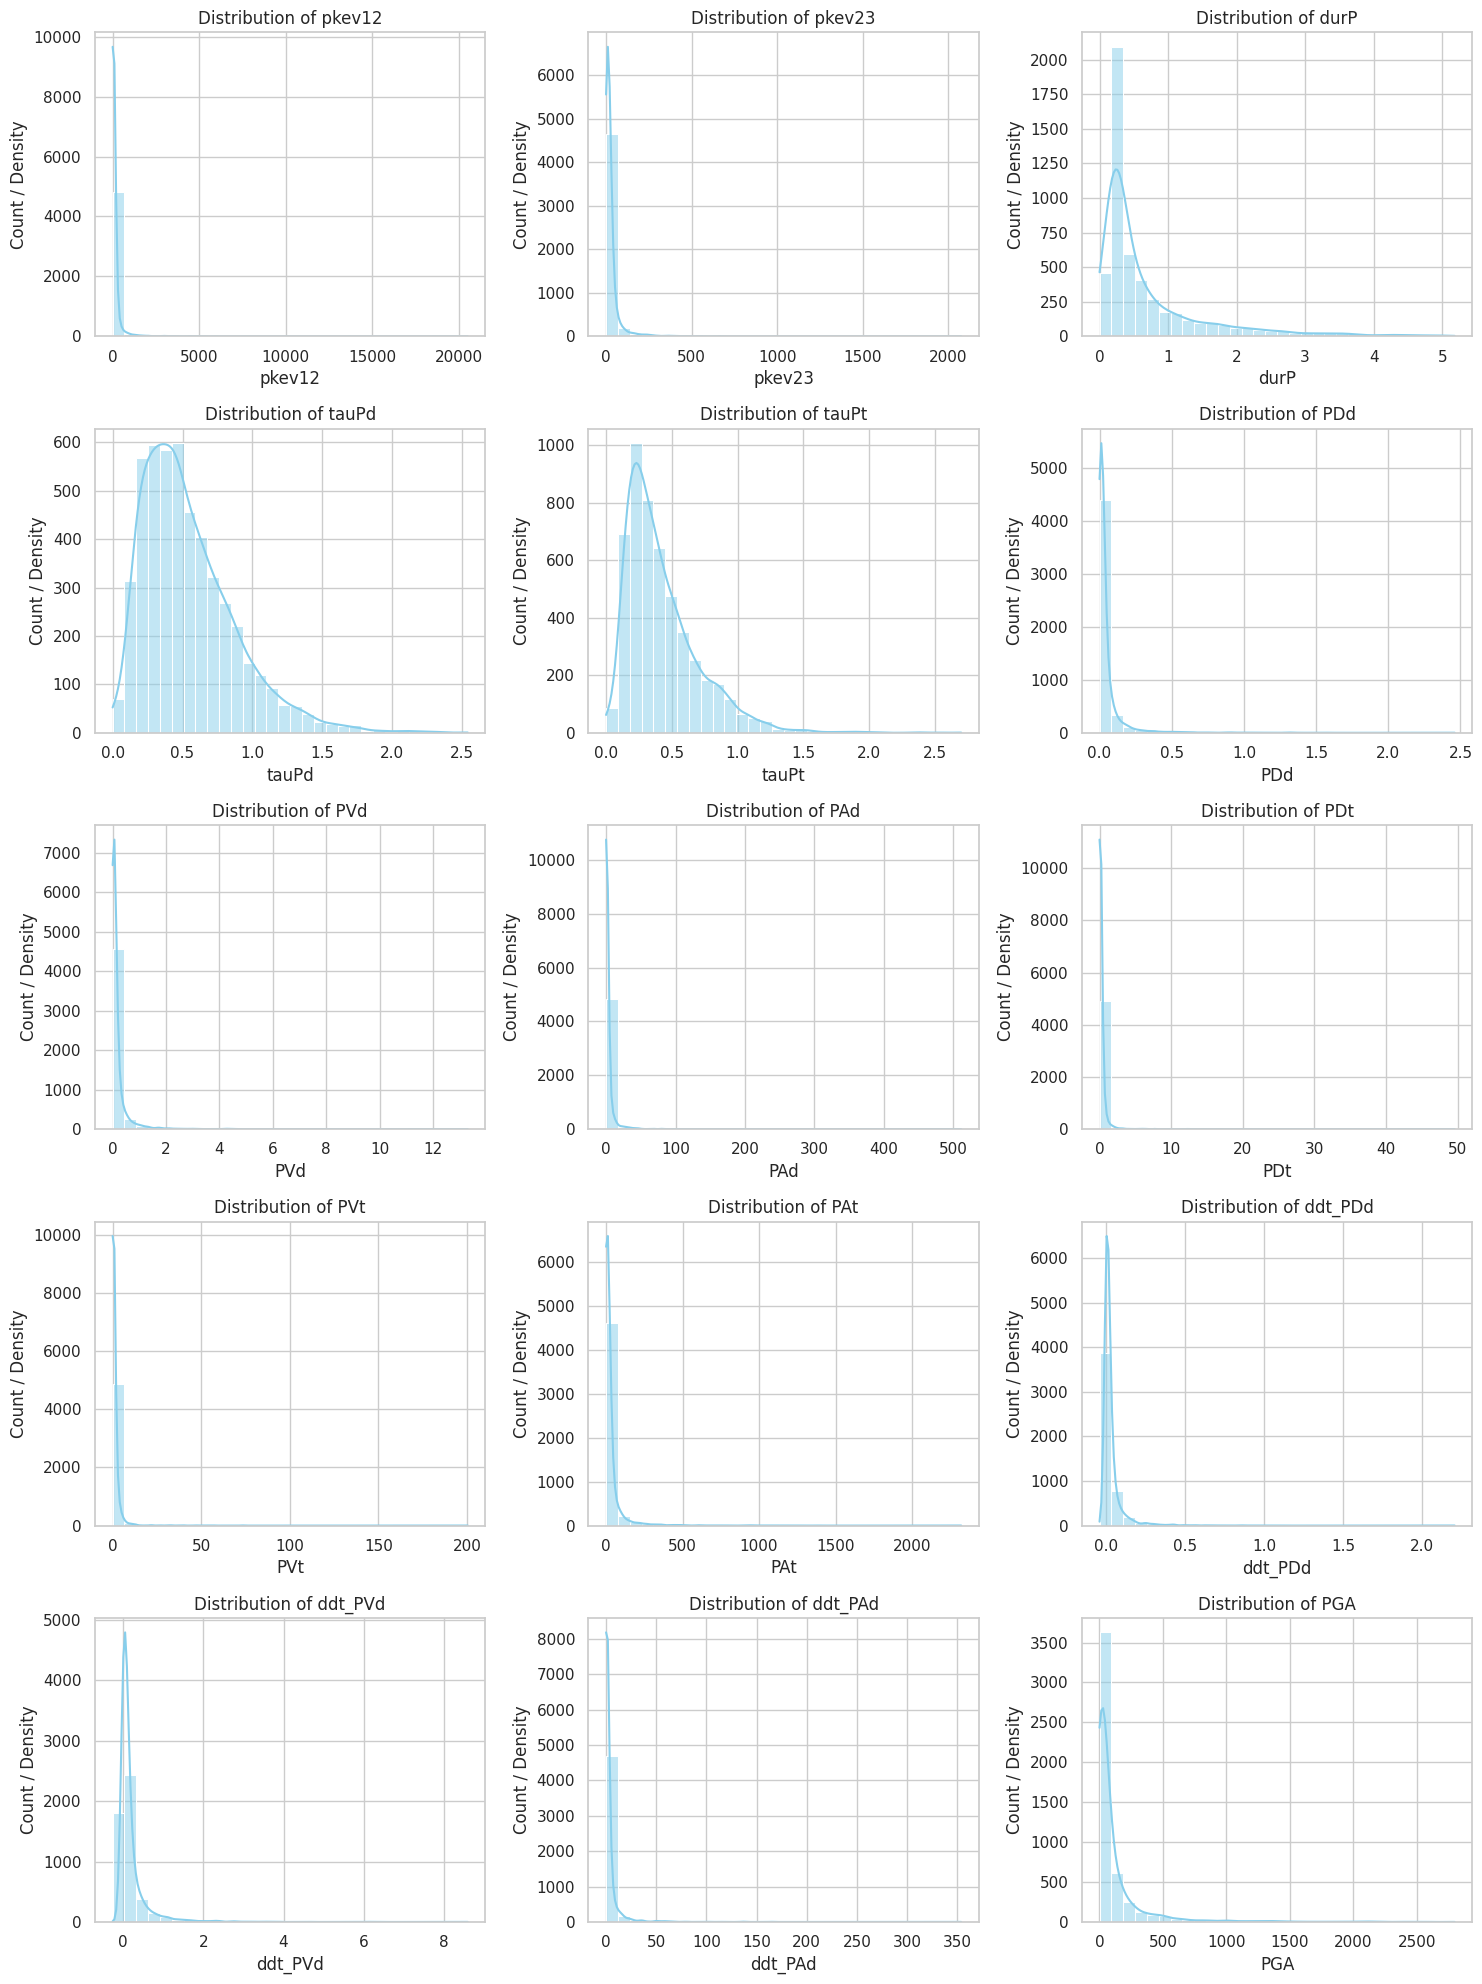

In [11]:
warnings.simplefilter(action='ignore', category=FutureWarning)
plot_data = plot_data.replace([np.inf, -np.inf], np.nan)

max_points = 5000
plot_data = plot_data.sample(n=max_points, random_state=42) if len(plot_data) > max_points else plot_data.copy()

features = plot_data.columns.tolist()
n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(plot_data[feature].dropna(), bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count / Density')

for j in range(n_features, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


NORMALITY CHECK




Skewness and Kurtosis:
pkev12: Skew = 42.01, Kurtosis = 3036.15
pkev23: Skew = 158.42, Kurtosis = 25207.58
durP: Skew = 2.56, Kurtosis = 10.27
tauPd: Skew = 5.19, Kurtosis = 194.76
tauPt: Skew = 8.99, Kurtosis = 446.69
PDd: Skew = 49.32, Kurtosis = 4537.26
PVd: Skew = 21.71, Kurtosis = 1071.09
PAd: Skew = 38.06, Kurtosis = 2553.26
PDt: Skew = 23.53, Kurtosis = 759.71
PVt: Skew = 22.11, Kurtosis = 667.20
PAt: Skew = 15.13, Kurtosis = 357.39
ddt_PDd: Skew = 103.66, Kurtosis = 14078.65
ddt_PVd: Skew = 14.17, Kurtosis = 413.91
ddt_PAd: Skew = 19.36, Kurtosis = 580.31
PGA: Skew = 6.10, Kurtosis = 60.26

Rows with outliers: 2342 / 25437


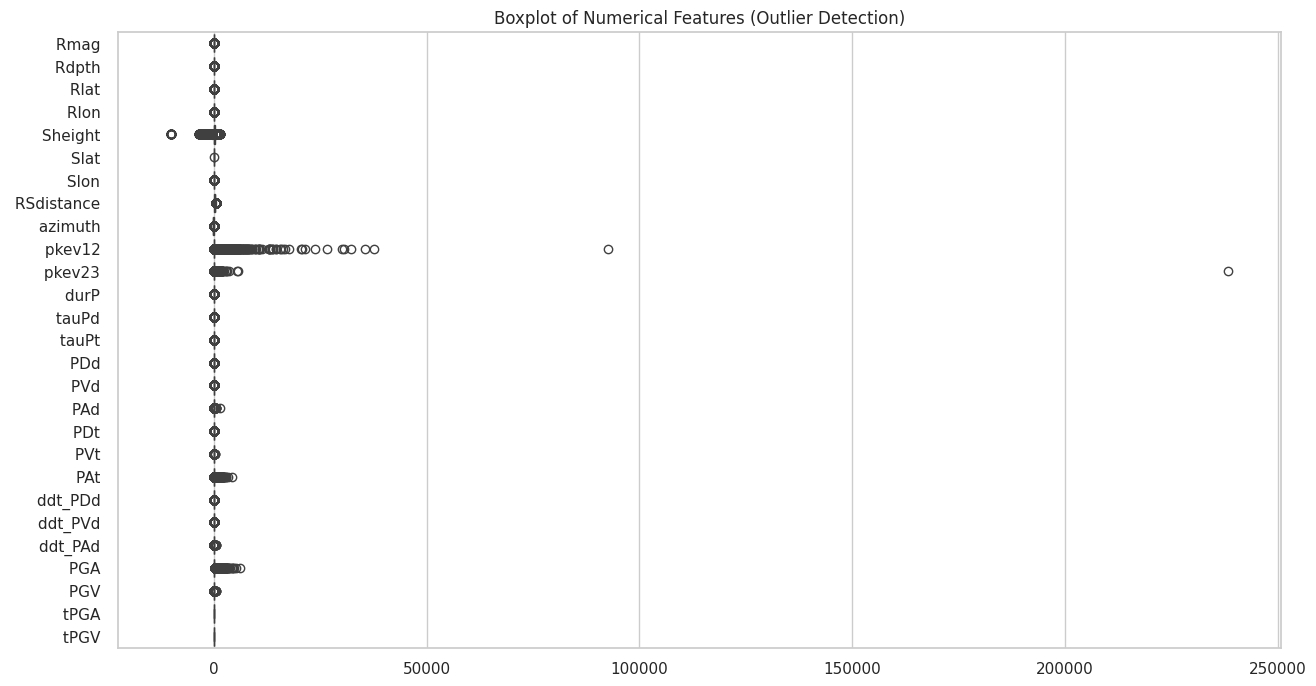

In [12]:
# Calculate skewness and kurtosis
print("\nSkewness and Kurtosis:")
for col in data.select_dtypes(include=[np.number]).columns:
    print(f"{col}: Skew = {data[col].skew():.2f}, Kurtosis = {data[col].kurt():.2f}")

# Detect outliers using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outlier_mask = (z_scores > 3)
print(f"\nRows with outliers: {np.sum(outlier_mask.any(axis=1))} / {data.shape[0]}")

# Visualize outliers with boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient='h')
plt.title("Boxplot of Numerical Features (Outlier Detection)")
plt.show()

In [13]:
# Shapiro-Wilk test for normality (sampled for speed)
print("\nNormality check (Shapiro-Wilk test):")
for col in data.select_dtypes(include=[np.number]).columns:
    stat, p = stats.shapiro(data[col].sample(min(5000, len(data))))  # limit sample size
    print(f"{col}: p-value = {p:.4f} --> {'Normal' if p > 0.05 else 'Not Normal'}")


Normality check (Shapiro-Wilk test):
pkev12: p-value = 0.0000 --> Not Normal
pkev23: p-value = 0.0000 --> Not Normal
durP: p-value = 0.0000 --> Not Normal
tauPd: p-value = 0.0000 --> Not Normal
tauPt: p-value = 0.0000 --> Not Normal
PDd: p-value = 0.0000 --> Not Normal
PVd: p-value = 0.0000 --> Not Normal
PAd: p-value = 0.0000 --> Not Normal
PDt: p-value = 0.0000 --> Not Normal
PVt: p-value = 0.0000 --> Not Normal
PAt: p-value = 0.0000 --> Not Normal
ddt_PDd: p-value = 0.0000 --> Not Normal
ddt_PVd: p-value = 0.0000 --> Not Normal
ddt_PAd: p-value = 0.0000 --> Not Normal
PGA: p-value = 0.0000 --> Not Normal


MULTICOLINEARITY CHECK

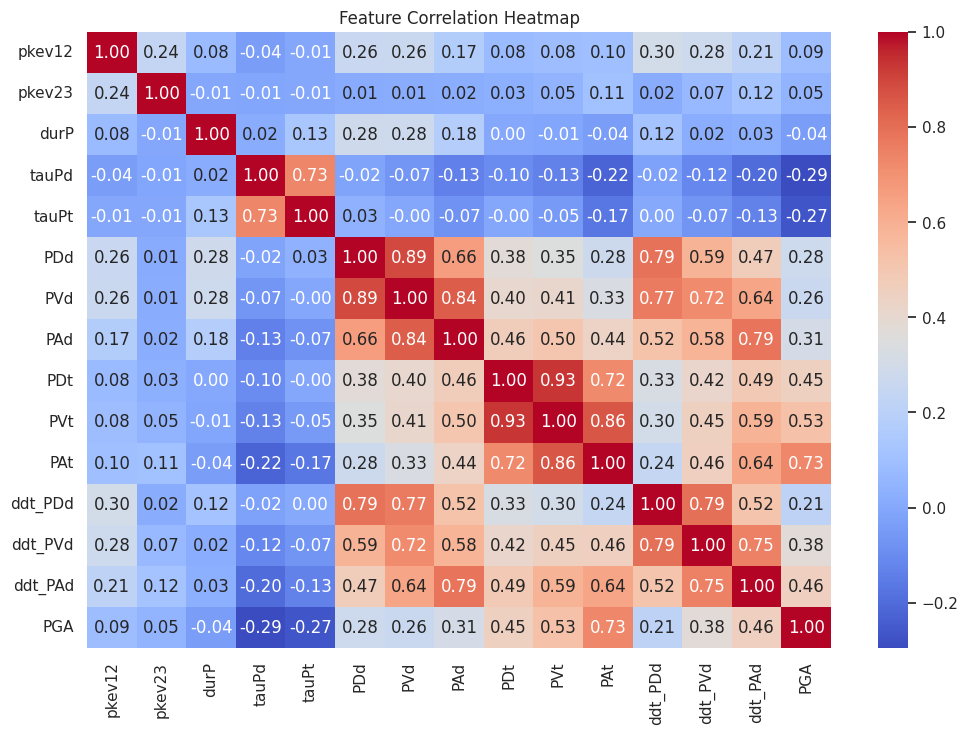


Variance Inflation Factor (VIF):
     Feature        VIF
0    pkev12   1.218953
1    pkev23   1.105949
2      durP   1.859761
3     tauPd   6.811198
4     tauPt   7.260916
5       PDd  10.128572
6       PVd  22.217681
7       PAd  11.034983
8       PDt  10.402499
9       PVt  20.072139
10      PAt   9.977096
11  ddt_PDd   6.439673
12  ddt_PVd   8.912626
13  ddt_PAd   8.039798
14      PGA   3.020819


In [14]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
# Remove the first row before calculating correlation and VIF
data_numeric = data.iloc[1:].select_dtypes(include=[np.number])
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = data_numeric.dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data)

In [15]:
import statsmodels.api as sm
from statsmodels.stats.api import het_breuschpagan
# Choose a target variable (e.g., tPGA or tPGV)
target_col = 'PGA'  # change as per your dataset

# Strip whitespace from column names
data.columns = data.columns.str.strip()

X = data.drop(columns=[target_col])
y = data[target_col]

X_const = sm.add_constant(X.select_dtypes(include=[np.number]))
model = sm.OLS(y, X_const).fit()

# Breusch–Pagan Test (heteroscedasticity)
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Stat', 'LM p-value', 'F Stat', 'F p-value']
print("\nBreusch–Pagan Test Results:")
print(dict(zip(labels, bp_test)))

# Durbin–Watson Test (autocorrelation)
dw_stat = sm.stats.durbin_watson(model.resid)
print(f"\nDurbin–Watson statistic: {dw_stat:.3f}")


Breusch–Pagan Test Results:
{'LM Stat': np.float64(6307.237751771386), 'LM p-value': np.float64(0.0), 'F Stat': np.float64(598.7028262367888), 'F p-value': np.float64(0.0)}

Durbin–Watson statistic: 1.294


In [16]:
!pip install --quiet optuna scikit-learn matplotlib pandas numpy

import os, random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 5.8 MB/s eta 0:00:00


In [18]:
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(4)

In [19]:
df = pd.read_csv("EEW_features_2024-10-21.csv")
df.columns = df.columns.str.strip()
for col in df.columns:
    if col not in ['filename', 'date', 'time']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.fillna(df.median(numeric_only=True))

p_wave_features = ['pkev12', 'pkev23', 'durP', 'tauPd', 'tauPt',
                   'PDd', 'PVd', 'PAd', 'PDt', 'PVt', 'PAt',
                   'ddt_PDd', 'ddt_PVd', 'ddt_PAd', 'ddt_PDt', 'ddt_PVt', 'ddt_PAt']

df = df[(df[p_wave_features] > 0).all(axis=1)]

X = df[p_wave_features]
y_raw = df['PGA']
X = np.log1p(X)
y_log = np.log1p(y_raw)

In [20]:
y_bins = pd.qcut(y_log, q=10, labels=False, duplicates='drop')
sss1 = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
train_idx, temp_idx = next(sss1.split(X, y_bins))
sss2 = StratifiedShuffleSplit(n_splits=1, train_size=0.5, random_state=42)
val_idx, test_idx = next(sss2.split(X.iloc[temp_idx], y_bins.iloc[temp_idx]))
val_idx, test_idx = temp_idx[val_idx], temp_idx[test_idx]

X_train, X_val, X_test = X.iloc[train_idx], X.iloc[val_idx], X.iloc[test_idx]
y_train_log, y_val_log, y_test_log = y_log.iloc[train_idx], y_log.iloc[val_idx], y_log.iloc[test_idx]
y_train_raw, y_val_raw, y_test_raw = y_raw.iloc[train_idx], y_raw.iloc[val_idx], y_raw.iloc[test_idx]

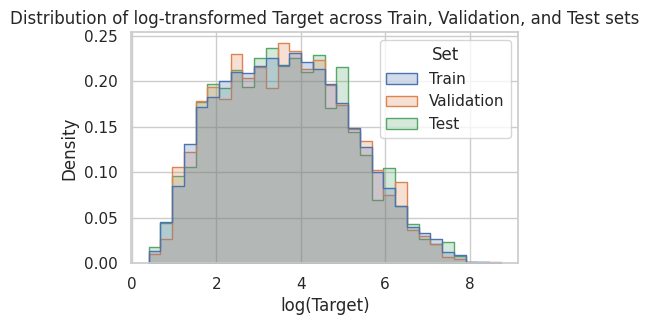

In [21]:
plot_df = pd.DataFrame({
    'Target (Log)': pd.concat([y_train_log, y_val_log, y_test_log], axis=0),
    'Set': ['Train']*len(y_train_log) + ['Validation']*len(y_val_log) + ['Test']*len(y_test_log)
})

plt.figure(figsize=(5,3))
sns.histplot(data=plot_df, x='Target (Log)', hue='Set', element='step', stat='density', common_norm=False, bins=30)
plt.title('Distribution of log-transformed Target across Train, Validation, and Test sets')
plt.xlabel('log(Target)')
plt.ylabel('Density')
plt.show()

In [22]:
def evaluate(model, X, y_log, y_raw):
    preds_log = model.predict(X)
    preds_raw = np.expm1(preds_log)

    metrics_log = {
        'R2': r2_score(y_log, preds_log),
        'MAE': mean_absolute_error(y_log, preds_log),
        'RMSE': np.sqrt(mean_squared_error(y_log, preds_log))
    }

    metrics_raw = {
        'R2': r2_score(y_raw, preds_raw),
        'MAE': mean_absolute_error(y_raw, preds_raw),
        'RMSE': np.sqrt(mean_squared_error(y_raw, preds_raw))
    }

    return metrics_log, metrics_raw

In [24]:
import optuna

#SUPPORT VECTOR MACHINE MODEL

In [30]:
from sklearn.svm import SVR
import numpy as np

# Instantiate and train Support Vector Regressor
# Using a radial basis function kernel (rbf) which is common for non-linear relationships.
# C and epsilon are hyperparameters that can be tuned.
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_sel, y_train_log)

# Evaluate Support Vector Regressor
metrics_train_log_svr, metrics_train_raw_svr = evaluate(svr_model, X_train_sel, y_train_log, y_train_raw)
metrics_val_log_svr, metrics_val_raw_svr = evaluate(svr_model, X_val_sel, y_val_log, y_val_raw)
metrics_test_log_svr, metrics_test_raw_svr = evaluate(svr_model, X_test_sel, y_test_log, y_test_raw)

print("Support Vector Regressor Evaluation Metrics (Log Scale):")
display(pd.DataFrame({'Train': metrics_train_log_svr, 'Val': metrics_val_log_svr, 'Test': metrics_test_log_svr}).T)
print("\nSupport Vector Regressor Evaluation Metrics (Raw Scale):")
display(pd.DataFrame({'Train': metrics_train_raw_svr, 'Val': metrics_val_raw_svr, 'Test': metrics_test_raw_svr}).T)

Support Vector Regressor Evaluation Metrics (Log Scale):


,R2,MAE,RMSE
Train,0.842914,0.460332,0.604733
Val,0.829331,0.477849,0.625702
Test,0.850197,0.460178,0.593346



Support Vector Regressor Evaluation Metrics (Raw Scale):


,R2,MAE,RMSE
Train,0.786195,44.824843,120.246976
Val,0.593943,49.982031,168.238149
Test,0.723146,51.224666,144.362608


Define the Optuna objective function for hyperparameter tuning of the SVR using cross-validation.


In [31]:
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd

def objective_svr(trial):
    param = {
        'C': trial.suggest_float('C', 1e-2, 1e3, log=True),
        'epsilon': trial.suggest_float('epsilon', 1e-3, 1e-1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-4, 1e-1, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf'])
    }

    y_bins_cv = pd.qcut(y_train_log, q=10, labels=False, duplicates='drop')
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    mae_scores = []

    for tr_idx, val_idx in skf.split(X_train_fe, y_bins_cv):
        X_tr, X_val_split = X_train_fe.iloc[tr_idx], X_train_fe.iloc[val_idx]
        y_tr, y_val_split = y_train_log.iloc[tr_idx], y_train_log.iloc[val_idx]

        scaler = RobustScaler()
        imputer = SimpleImputer(strategy='median')
        selector = SelectKBest(score_func=f_regression, k='all')

        X_tr_prep = selector.fit_transform(imputer.fit_transform(scaler.fit_transform(X_tr)), y_tr)
        X_val_prep = selector.transform(imputer.transform(scaler.transform(X_val_split)))

        model = SVR(**param)
        model.fit(X_tr_prep, y_tr)
        preds = model.predict(X_val_prep)
        mae_scores.append(mean_absolute_error(y_val_split, preds))

    return np.mean(mae_scores)

Create and optimize the Optuna study for the SVR model using the defined objective function and specify the number of trials and timeout.



In [33]:
def objective_svr(trial):
    param = {
        'C': trial.suggest_float('C', 1e-2, 1e3, log=True),
        'epsilon': trial.suggest_float('epsilon', 1e-3, 1e-1, log=True),
        'gamma': trial.suggest_float('gamma', 1e-4, 1e-1, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf'])
    }

    y_bins_cv = pd.qcut(y_train_log, q=10, labels=False, duplicates='drop')
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    mae_scores = []

    # Use the preprocessed training data X_train_sel
    for tr_idx, val_idx in skf.split(X_train_sel, y_bins_cv):
        X_tr, X_val_split = X_train_sel[tr_idx], X_train_sel[val_idx]
        y_tr, y_val_split = y_train_log.iloc[tr_idx], y_train_log.iloc[val_idx]


        model = SVR(**param)
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val_split)
        mae_scores.append(mean_absolute_error(y_val_split, preds))

    return np.mean(mae_scores)

study_svr = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study_svr.optimize(objective_svr, n_trials=50, timeout=1800)

print("Best trial for SVR:")
print("  Value: {}".format(study_svr.best_trial.value))
print("  Params: ")
for key, value in study_svr.best_trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-10-24 03:06:57,201] A new study created in memory with name: no-name-e2309bbc-1aea-4603-8739-6fd70127a574
[I 2025-10-24 03:08:19,664] Trial 0 finished with value: 0.4866627172001789 and parameters: {'C': 0.7459343285726545, 'epsilon': 0.07969454818643935, 'gamma': 0.015702970884055395, 'kernel': 'linear'}. Best is trial 0 with value: 0.4866627172001789.
[I 2025-10-24 03:08:54,475] Trial 1 finished with value: 0.5151197970173854 and parameters: {'C': 0.060252157362038566, 'epsilon': 0.0013066739238053278, 'gamma': 0.0396760507705299, 'kernel': 'rbf'}. Best is trial 0 with value: 0.4866627172001789.
[I 2025-10-24 03:09:16,299] Trial 2 finished with value: 0.48985102938617686 and parameters: {'C': 0.012674255898937233, 'epsilon': 0.08706020878304858, 'gamma': 0.03142880890840111, 'kernel': 'linear'}. Best is trial 0 with value: 0.4866627172001789.
[I 2025-10-24 03:09:49,040] Trial 3 finished with value: 0.48701538016677004 and parameters: {'C': 0.08260808399079603, 'epsilon': 0.00

Best trial for SVR:
  Value: 0.4830832377067669
  Params: 
    C: 11.462107403425028
    epsilon: 0.0019010245319870357
    gamma: 0.0007523742884534858
    kernel: rbf


Create and run the Optuna study to find the best hyperparameters for the SVR.


In [34]:
study_svr = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=42))
study_svr.optimize(objective_svr, n_trials=50, timeout=1800)

print("Best trial for SVR:")
print("  Value: {}".format(study_svr.best_trial.value))
print("  Params: ")
for key, value in study_svr.best_trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-10-24 04:20:49,048] A new study created in memory with name: no-name-245d0917-5d42-4081-80d0-b13388c139fa
[I 2025-10-24 04:22:14,002] Trial 0 finished with value: 0.4866627172001789 and parameters: {'C': 0.7459343285726545, 'epsilon': 0.07969454818643935, 'gamma': 0.015702970884055395, 'kernel': 'linear'}. Best is trial 0 with value: 0.4866627172001789.
[I 2025-10-24 04:22:50,582] Trial 1 finished with value: 0.5151197970173854 and parameters: {'C': 0.060252157362038566, 'epsilon': 0.0013066739238053278, 'gamma': 0.0396760507705299, 'kernel': 'rbf'}. Best is trial 0 with value: 0.4866627172001789.
[I 2025-10-24 04:23:13,329] Trial 2 finished with value: 0.48985102938617686 and parameters: {'C': 0.012674255898937233, 'epsilon': 0.08706020878304858, 'gamma': 0.03142880890840111, 'kernel': 'linear'}. Best is trial 0 with value: 0.4866627172001789.
[I 2025-10-24 04:23:47,844] Trial 3 finished with value: 0.48701538016677004 and parameters: {'C': 0.08260808399079603, 'epsilon': 0.00

Best trial for SVR:
  Value: 0.4830832377067669
  Params: 
    C: 11.462107403425028
    epsilon: 0.0019010245319870357
    gamma: 0.0007523742884534858
    kernel: rbf


Train the final SVR model using the best hyperparameters found by Optuna on the full training data.



In [36]:
# Access the best hyperparameters for the SVR model from the completed Optuna study.
if 'study_svr' in locals() and study_svr.best_trial:
    best_svr_params = study_svr.best_trial.params

    # Instantiate a SVR model using these best hyperparameters
    tuned_svr_model = SVR(**best_svr_params)

    # Train the SVR model on the preprocessed training data
    tuned_svr_model.fit(X_train_sel, y_train_log)

    print("Tuned SVR model training complete.")
else:
    print("SVR Optuna study did not complete successfully or no best trial found.")

Tuned SVR model training complete.


Evaluate the performance of the tuned SVR model on the training, validation, and test sets on both log and raw scales.



In [37]:
# Evaluate Tuned SVR Regressor
metrics_train_log_tuned_svr, metrics_train_raw_tuned_svr = evaluate(tuned_svr_model, X_train_sel, y_train_log, y_train_raw)
metrics_val_log_tuned_svr, metrics_val_raw_tuned_svr = evaluate(tuned_svr_model, X_val_sel, y_val_log, y_val_raw)
metrics_test_log_tuned_svr, metrics_test_raw_tuned_svr = evaluate(tuned_svr_model, X_test_sel, y_test_log, y_test_raw)

print("Tuned SVR Regressor Evaluation Metrics (Log Scale):")
display(pd.DataFrame({'Train': metrics_train_log_tuned_svr, 'Val': metrics_val_log_tuned_svr, 'Test': metrics_test_log_tuned_svr}).T)
print("\nTuned SVR Regressor Evaluation Metrics (Raw Scale):")
display(pd.DataFrame({'Train': metrics_train_raw_tuned_svr, 'Val': metrics_val_raw_tuned_svr, 'Test': metrics_test_raw_tuned_svr}).T)

Tuned SVR Regressor Evaluation Metrics (Log Scale):


,R2,MAE,RMSE
Train,0.831875,0.478048,0.625622
Val,0.823360,0.484748,0.636553
Test,0.845315,0.464941,0.602938



Tuned SVR Regressor Evaluation Metrics (Raw Scale):


,R2,MAE,RMSE
Train,0.768692,48.008948,125.072079
Val,0.672696,49.489385,151.045027
Test,0.762774,50.273414,133.632199




###Key Findings :

*   Optuna successfully tuned the SVR model, finding the best hyperparameters based on minimizing the Mean Absolute Error (MAE) during cross-validation.
*   The best SVR model achieved a cross-validation MAE of approximately 0.483.
*   The optimal hyperparameters found for the SVR were: C=11.46, epsilon=0.0019, gamma=0.00075, and the kernel was 'rbf'.
*   The tuned SVR model was successfully trained on the full training dataset using the identified best hyperparameters.
*   The tuned SVR model was evaluated on the training, validation, and test sets for both log-transformed and raw target variables, providing R2, MAE, and RMSE metrics for each.


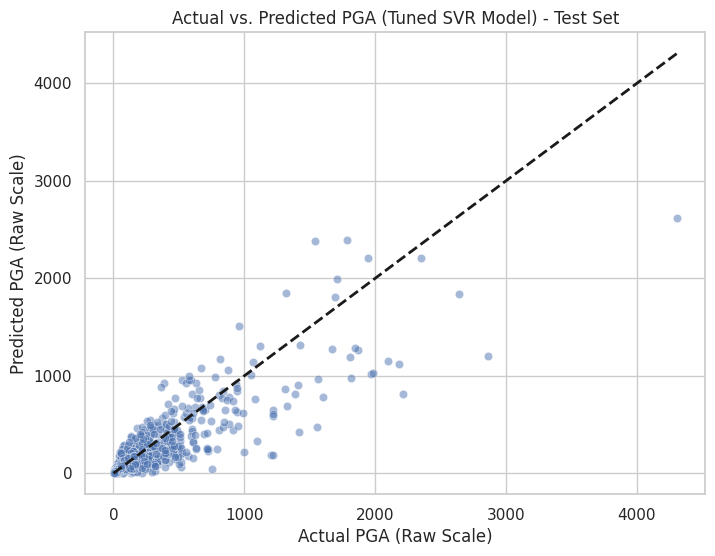

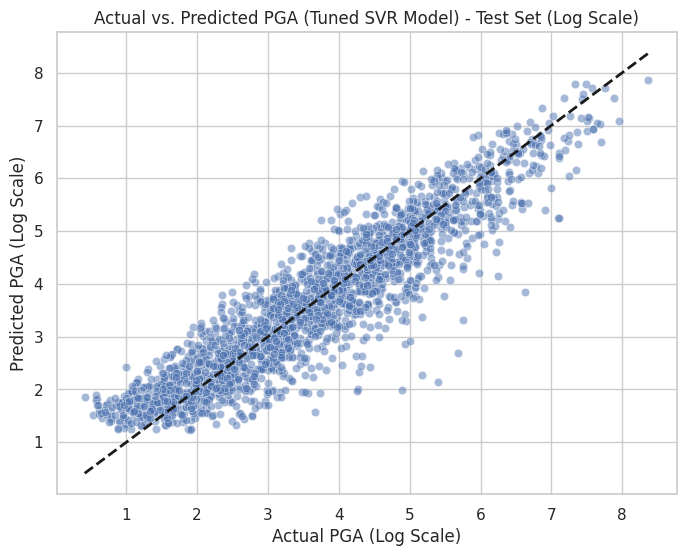

In [40]:
tuned_svr_preds_log = tuned_svr_model.predict(X_test_sel)
tuned_svr_preds_raw = np.expm1(tuned_svr_preds_log)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_raw, y=tuned_svr_preds_raw, alpha=0.5)
plt.xlabel("Actual PGA (Raw Scale)")
plt.ylabel("Predicted PGA (Raw Scale)")
plt.title("Actual vs. Predicted PGA (Tuned SVR Model) - Test Set")
plt.plot([y_test_raw.min(), y_test_raw.max()], [y_test_raw.min(), y_test_raw.max()], 'k--', lw=2) # Add a diagonal line
plt.show()

# Create a scatter plot of actual vs. predicted values (log scale)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_log, y=tuned_svr_preds_log, alpha=0.5)
plt.xlabel("Actual PGA (Log Scale)")
plt.ylabel("Predicted PGA (Log Scale)")
plt.title("Actual vs. Predicted PGA (Tuned SVR Model) - Test Set (Log Scale)")
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=2) # Add a diagonal line
plt.show()